# Neural Network Regression with Different Loss Functions

이번 실습에서는 TensorFlow를 활용하여 Neural Network 회귀 모델을 만들고, 
다양한 손실 함수 (MSE, MAE, Huber Loss)를 적용하여 비교해봅니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 1. 데이터 불러오기 및 전처리

In [2]:
# 1. 데이터 불러오기
housing = fetch_california_housing()
X = housing.data
y = housing.target

# 2. train / test 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 2. 모델 정의 함수

In [3]:
def build_model(loss_fn):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=X_train.shape[1:]),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(1)   # 회귀 출력
    ])
    model.compile(optimizer="adam", loss=loss_fn, metrics=["mae"])
    return model

## 3. 손실 함수별 학습 (MSE, MAE, Huber Loss)

In [4]:
loss_functions = {
    "MSE": "mse",
    "MAE": "mae",
    "Huber": tf.keras.losses.Huber()
}

histories = {}

for name, loss_fn in loss_functions.items():
    print(f"\n=== Training with {name} Loss ===")
    model = build_model(loss_fn)
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=20,
        batch_size=32,
        verbose=2
    )
    histories[name] = history


=== Training with MSE Loss ===


ValueError: Unrecognized keyword arguments: ['shape']

In [ ]:
loss_functions = {
    "MSE": "mse",
    "MAE": "mae",
    "Huber": tf.keras.losses.Huber()
}

histories = {}

for name, loss_fn in loss_functions.items():
    print(f"\n=== Training with {name} Loss ===")
    model = build_model(loss_fn)
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=20,
        batch_size=32,
        verbose=2
    )
    histories[name] = history


=== Training with MSE Loss ===


ValueError: Unrecognized keyword arguments: ['shape']

## 4. 학습 결과 시각화

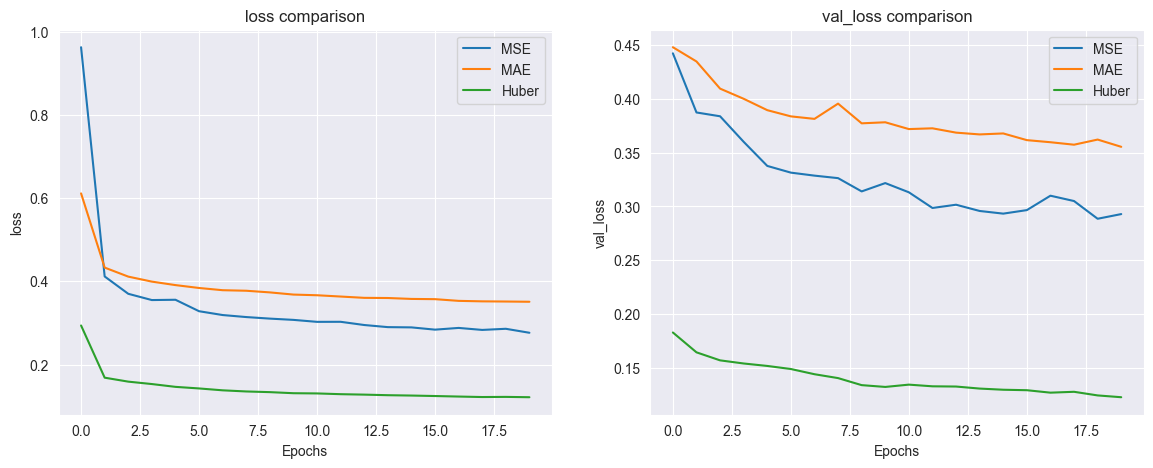

In [5]:
plt.figure(figsize=(14,5))

for i, metric in enumerate(["loss", "val_loss"]):
    plt.subplot(1, 2, i+1)
    for name, history in histories.items():
        plt.plot(history.history[metric], label=f"{name}")
    plt.title(f"{metric} comparison")
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend()

plt.show()